In [2]:
import tensorflow as tf

import numpy as np

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import pandas as pd

#data = pd.read_csv('bitcoin.csv')
data = pd.read_csv('bitcoin2000.csv')

In [4]:
data.set_index(['timeUTC'],inplace=True)
#data = data['item_cnt_day'].resample('D').sum()
df=pd.DataFrame(data)

In [5]:
len(data)

10005

In [6]:
data

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
timeUTC,,,,,,,,,
2019-12-12 19:00:00,1576144800,7219.93,7149.15,7170.18,1536.79,11041994.81,7166.14,direct,NaN
2019-12-12 20:00:00,1576148400,7208.36,7166.03,7166.14,785.11,5654607.43,7199.79,direct,NaN
2019-12-12 21:00:00,1576152000,7222.43,7194.87,7199.79,672.46,4855213.22,7199.97,direct,NaN
2019-12-12 22:00:00,1576155600,7211.80,7187.29,7199.97,807.61,5821087.81,7201.38,direct,NaN
2019-12-12 23:00:00,1576159200,7229.22,7152.84,7201.38,1606.06,11537799.57,7173.50,direct,NaN
...,...,...,...,...,...,...,...,...,...
2021-02-01 11:00:00,1612144800,33847.46,33257.39,33450.01,2066.49,69445570.35,33675.45,direct,NaN
2021-02-01 12:00:00,1612148400,33779.76,33505.50,33675.45,1173.82,39473368.04,33590.20,direct,NaN
2021-02-01 13:00:00,1612152000,33945.41,33404.87,33590.20,1430.06,48159838.72,33576.82,direct,NaN


In [7]:
data.columns[1:7]

Index(['high', 'low', 'open', 'volumefrom', 'volumeto', 'close'], dtype='object')

In [8]:
from sklearn.preprocessing import MinMaxScaler
values = data[data.columns[1:7]].values.reshape(-1,6)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
#scaled = (values-(np.min(values)))/(np.max(values)-(np.min(values)))

In [9]:
train_size = int(len(scaled) * 0.80)+1
val_size = int(len(scaled) * 0.10)

test_size = len(scaled) - train_size-val_size
train,val, test,Test = scaled[0:train_size,:],scaled[train_size:train_size+val_size,:], scaled[train_size+val_size:,:],values[train_size+val_size:]
print(len(train),len(val), len(test),len(Test))

8005 1000 1000 1000


In [10]:
data[0:train_size]

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
timeUTC,,,,,,,,,
2019-12-12 19:00:00,1576144800,7219.93,7149.15,7170.18,1536.79,11041994.81,7166.14,direct,NaN
2019-12-12 20:00:00,1576148400,7208.36,7166.03,7166.14,785.11,5654607.43,7199.79,direct,NaN
2019-12-12 21:00:00,1576152000,7222.43,7194.87,7199.79,672.46,4855213.22,7199.97,direct,NaN
2019-12-12 22:00:00,1576155600,7211.80,7187.29,7199.97,807.61,5821087.81,7201.38,direct,NaN
2019-12-12 23:00:00,1576159200,7229.22,7152.84,7201.38,1606.06,11537799.57,7173.50,direct,NaN
...,...,...,...,...,...,...,...,...,...
2020-11-10 03:00:00,1604944800,15325.75,15172.91,15236.35,1527.43,23280514.73,15322.03,direct,NaN
2020-11-10 04:00:00,1604948400,15455.01,15286.79,15322.03,1999.79,30746523.18,15372.50,direct,NaN
2020-11-10 05:00:00,1604952000,15503.45,15366.35,15372.50,1876.57,28964431.07,15378.90,direct,NaN


In [11]:
data[train_size:train_size+val_size]

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
timeUTC,,,,,,,,,
2020-11-10 08:00:00,1604962800,15353.40,15255.25,15255.27,733.44,1.122140e+07,15335.03,direct,NaN
2020-11-10 09:00:00,1604966400,15348.32,15197.88,15335.03,692.55,1.056667e+07,15307.09,direct,NaN
2020-11-10 10:00:00,1604970000,15400.46,15278.33,15307.09,630.25,9.675327e+06,15399.02,direct,NaN
2020-11-10 11:00:00,1604973600,15429.15,15352.83,15399.02,691.79,1.063882e+07,15354.00,direct,NaN
2020-11-10 12:00:00,1604977200,15366.93,15283.14,15354.00,1049.89,1.607555e+07,15344.93,direct,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-21 19:00:00,1608544800,23462.82,22428.63,23440.34,10357.45,2.369430e+08,22428.76,direct,NaN
2020-12-21 20:00:00,1608548400,22809.29,22340.40,22428.76,4286.86,9.706873e+07,22625.32,direct,NaN
2020-12-21 21:00:00,1608552000,22639.70,22015.91,22625.32,7616.82,1.694493e+08,22290.86,direct,NaN


In [12]:
data[train_size+val_size:]

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
timeUTC,,,,,,,,,
2020-12-22 00:00:00,1608562800,23203.86,22926.26,23168.69,3151.71,7.269096e+07,23099.63,direct,NaN
2020-12-22 01:00:00,1608566400,23324.38,22984.11,23099.63,3178.90,7.369829e+07,23221.57,direct,NaN
2020-12-22 02:00:00,1608570000,23231.33,22663.69,23221.57,4378.20,1.001977e+08,22716.90,direct,NaN
2020-12-22 03:00:00,1608573600,22953.35,22664.79,22716.90,2861.56,6.526634e+07,22807.43,direct,NaN
2020-12-22 04:00:00,1608577200,22945.18,22704.33,22807.43,1966.61,4.487649e+07,22816.03,direct,NaN
...,...,...,...,...,...,...,...,...,...
2021-02-01 11:00:00,1612144800,33847.46,33257.39,33450.01,2066.49,6.944557e+07,33675.45,direct,NaN
2021-02-01 12:00:00,1612148400,33779.76,33505.50,33675.45,1173.82,3.947337e+07,33590.20,direct,NaN
2021-02-01 13:00:00,1612152000,33945.41,33404.87,33590.20,1430.06,4.815984e+07,33576.82,direct,NaN


In [13]:
def create_dataset_multistep(dataset, look_back=1,predict=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-predict):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i+ look_back-1: i+ look_back+predict-1, -1])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [14]:
look_back = 168
predict=24
trainX, trainY = create_dataset_multistep(train, look_back,predict)
valX, valY = create_dataset_multistep(val, look_back,predict)
testX, testY = create_dataset_multistep(test, look_back,predict)

7813
808
808


In [15]:
TestX, TestY = create_dataset_multistep(Test, look_back,predict)

808


In [16]:
list(TestY[24*10])

[38499.09,
 38994.32,
 39155.91,
 39772.09,
 38698.38,
 39085.54,
 39141.7,
 39728.88,
 39699.69,
 39479.41,
 38837.05,
 38694.99,
 37222.29,
 38383.56,
 38719.22,
 37975.24,
 38549.17,
 38961.07,
 38648.75,
 39364.66,
 40757.76,
 41310.25,
 41323.92,
 41347.41]

(<Figure size 1152x144 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f31ee2937f0>)

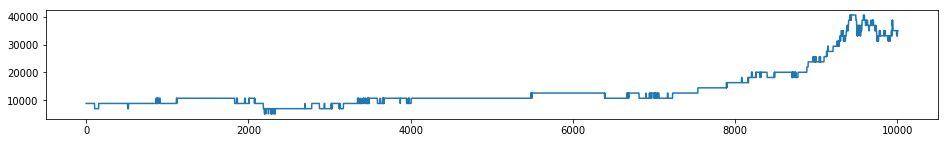

In [17]:
from tsaug import TimeWarp, Crop, Quantize, Drift, Reverse
from tsaug.visualization import plot

my_augmenter = (Quantize(n_levels=[20]))

#my_augmenter=TimeWarp()
X_aug1= my_augmenter.augment(data['close'].values)
plot(X_aug1)

In [18]:
quant=scaler.fit_transform(X_aug1.reshape(-1,1))

In [19]:
train_size = int(len(scaled) * 0.80)
val_size = int(len(scaled) * 0.10)

test_size = len(scaled) - train_size-val_size
train_q,val_q, test_q = quant[0:train_size,:],quant[train_size:train_size+val_size,:], quant[train_size+val_size:,:]
print(len(train_q),len(val_q), len(test_q))

8004 1000 1001


In [16]:
def create_dataset_multistep_uni(dataset, look_back=1,predict=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-predict):
        a = dataset[i:(i + look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+ look_back-1: i+ look_back+predict-1, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [17]:
look_back = 72
predict=24
trainX_q, trainY_q = create_dataset_multistep_uni(train_q, look_back,predict)
valX_q, valY_q = create_dataset_multistep_uni(val_q, look_back,predict)
testX_q, testY_q = create_dataset_multistep_uni(test_q, look_back,predict)

7908
904
905


In [55]:
look_back = 168
predict=24
trainX_o, trainY_o = create_dataset_multistep_uni(train, look_back,predict)
valX_o, valY_o = create_dataset_multistep_uni(val, look_back,predict)
testX_o, testY_o = create_dataset_multistep_uni(test, look_back,predict)

7812
808
809


In [66]:
trainX_o = np.reshape(trainX_o, (trainX_o.shape[0], trainX_o.shape[1], 1))
valX_o = np.reshape(valX_o, (valX_o.shape[0], valX_o.shape[1],1))
testX_o = np.reshape(testX_o, (testX_o.shape[0],testX_o.shape[1], 1 ))

In [20]:
trainX_q = np.reshape(trainX_q, (trainX_q.shape[0], trainX_q.shape[1], 1))
valX_q = np.reshape(valX_q, (valX_q.shape[0], valX_q.shape[1],1))
testX_q = np.reshape(testX_q, (testX.shape[0],testX_q.shape[1], 1 ))

ValueError: cannot reshape array of size 65160 into shape (929,72,1)

In [194]:
print(trainX.shape)
#print(trainX_q.shape)

(7813, 168, 6)


In [27]:
print(valX.shape)
#print(valX_q.shape)

(928, 48, 6)


In [29]:
print(testX.shape)
#print(valX_o.shape)


(928, 48, 6)


# new

In [20]:
first_input = Input(shape=(168,6))


in00=LSTM(64,return_sequences=True)(first_input)
#in1=ad9d([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in00) #main
#in1= BatchNormalization(scale=False)(in0)
#a=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0) #skip

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

ad=add([in0,in1],name='extractor')

#ad=MaxPooling1D(pool_size=2)(ad)

#ad=Dropout(0.5)(ad)
#in0=LSTM(64,return_sequences=True)(ad)
#in1=add([first_input,in0])
#ad=add([in00,ad])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(ad)


#in1= BatchNormalization(scale=False)(in0)
#b=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(ad) #skip
#ad=add([ad,ad1],name='extractor1')
in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

ad1=add([in0,in1],name='extractor2')
#ad1=add([in00, ad1])

#in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(ad1)
#in1= BatchNormalization(scale=False)(in0)

#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([ad1,in1],name='extractor2')
#in0=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)

#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1])

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2)(ad1)
#ad1=MaxPooling1D(pool_size=2)(ad1)
in1=Flatten()(ad1)
#in1=Dropout(0.5)(in1)
#in1=Dense(100, activation='relu')(in1)
out=Dense(24,'relu')(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

model.summary()



checkpoint_path = "saved_weights/btc_multi_lstmrescnn_24.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 168, 6)]     0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 168, 64)      18176       input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 168, 64)      12352       lstm[0][0]                       
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 168, 64)      8256        conv1d[0][0]                     
______________________________________________________________________________________________

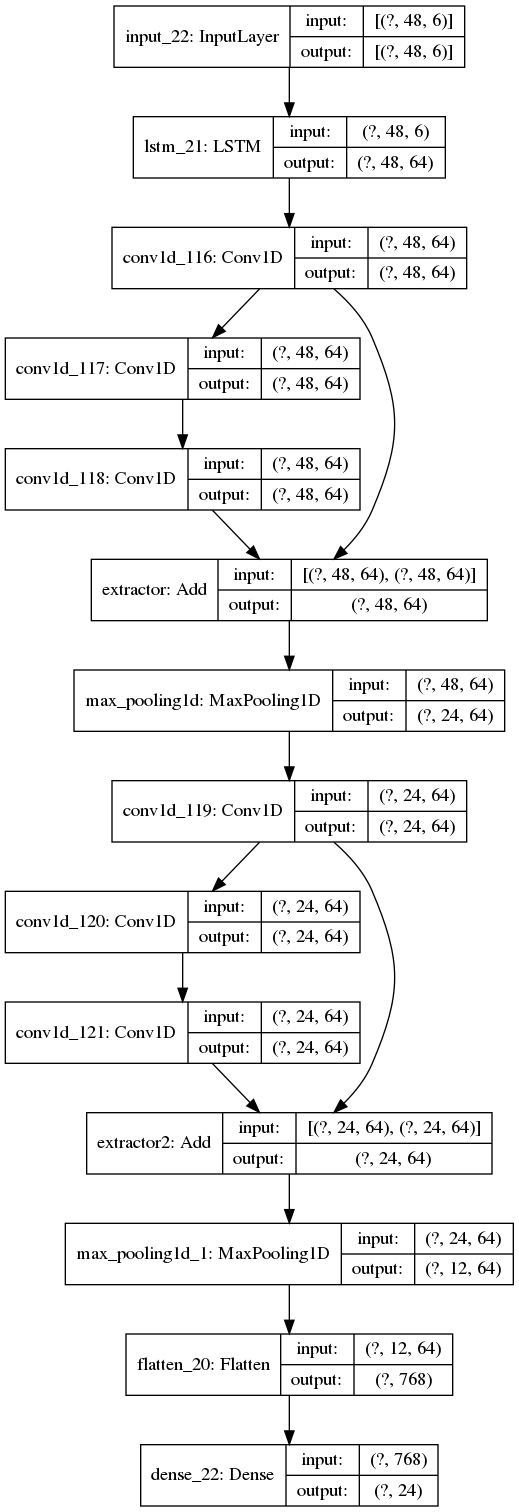

In [186]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
%matplotlib inline
dot_img_file = './model_experi.png'

plot_model(model, to_file=dot_img_file, show_shapes=True)

In [202]:
hist = model.fit([trainX],trainY, epochs = 100,validation_data=([valX],valY), verbose = 1,callbacks=[cb])

Train on 7813 samples, validate on 808 samples
Epoch 1/100
7808/7813 [============================>.] - ETA: 0s - loss: 3.9069e-05
Epoch 00001: val_loss improved from 0.00019 to 0.00019, saving model to saved_weights/btc_multi_lstmrescnn_24.hdf5
7813/7813 [==============================] - 13s 2ms/sample - loss: 3.9076e-05 - val_loss: 1.8769e-04
Epoch 2/100
7808/7813 [============================>.] - ETA: 0s - loss: 3.2450e-05
Epoch 00002: val_loss did not improve from 0.00019
7813/7813 [==============================] - 13s 2ms/sample - loss: 3.2449e-05 - val_loss: 2.0386e-04
Epoch 3/100
7808/7813 [============================>.] - ETA: 0s - loss: 3.3076e-05
Epoch 00003: val_loss did not improve from 0.00019
7813/7813 [==============================] - 13s 2ms/sample - loss: 3.3071e-05 - val_loss: 2.0146e-04
Epoch 4/100
7808/7813 [============================>.] - ETA: 0s - loss: 3.3274e-05
Epoch 00004: val_loss did not improve from 0.00019
7813/7813 [==============================] 

Epoch 35/100
 768/7813 [=>............................] - ETA: 11s - loss: 2.2549e-05WARNING:tensorflow:Can save best model only with val_loss available, skipping.


KeyboardInterrupt: 

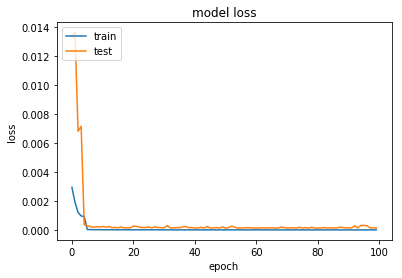

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

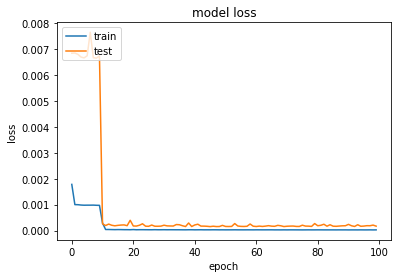

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [175]:
model.load_weights('saved_weights/btc_multi_lstmrescnn.hdf5')

In [21]:
model.load_weights('saved_weights/btc_multi_lstmrescnn_24.hdf5')

In [204]:
j=[12, 4, 0, 26, 29, 5, 31, 30, 24, 14, 10, 13, 19, 32, 3]


In [200]:
from math import *
from sklearn.metrics import *

In [205]:

aug_rm=[]
aug_ma=[]

for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k+1]
    testy=testY[24*k+1]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)

    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)
    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.03373
Test RMSE: 0.03995
Test MAE: 0.01046
Test RMSE: 0.01712
Test MAE: 0.01531
Test RMSE: 0.01726
Test MAE: 0.02790
Test RMSE: 0.02987
Test MAE: 0.04699
Test RMSE: 0.05898
Test MAE: 0.03809
Test RMSE: 0.04529
Test MAE: 0.14687
Test RMSE: 0.17002
Test MAE: 0.13974
Test RMSE: 0.15290
Test MAE: 0.02720
Test RMSE: 0.03329
Test MAE: 0.05495
Test RMSE: 0.06265
Test MAE: 0.18303
Test RMSE: 0.19329
Test MAE: 0.19039
Test RMSE: 0.21921
Test MAE: 0.05948
Test RMSE: 0.06711
Test MAE: 0.09060
Test RMSE: 0.09726
Test MAE: 0.01100
Test RMSE: 0.01303
0.08114841340188236
0.071716614


In [22]:
aug_rm=[]
aug_ma=[]

for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)

    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)
    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.01538
Test RMSE: 0.02091
Test MAE: 0.01726
Test RMSE: 0.01914
Test MAE: 0.01651
Test RMSE: 0.01814
Test MAE: 0.00926
Test RMSE: 0.01159
Test MAE: 0.01369
Test RMSE: 0.01865
Test MAE: 0.01773
Test RMSE: 0.01942
Test MAE: 0.01296
Test RMSE: 0.01536
Test MAE: 0.01448
Test RMSE: 0.01919
Test MAE: 0.03740
Test RMSE: 0.04550
Test MAE: 0.05860
Test RMSE: 0.06520
Test MAE: 0.03907
Test RMSE: 0.04454
Test MAE: 0.04762
Test RMSE: 0.05224
Test MAE: 0.03874
Test RMSE: 0.04367
Test MAE: 0.02096
Test RMSE: 0.02587
Test MAE: 0.03010
Test RMSE: 0.03457
0.030265608477639896
0.025984263


In [25]:

aug_rm=[]
aug_ma=[]

for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k+1]
    testy=testY[24*k+1]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)

    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)
    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.02239
Test RMSE: 0.02589
Test MAE: 0.01635
Test RMSE: 0.01840
Test MAE: 0.01569
Test RMSE: 0.01718
Test MAE: 0.01203
Test RMSE: 0.01718
Test MAE: 0.01363
Test RMSE: 0.01745
Test MAE: 0.01620
Test RMSE: 0.01763
Test MAE: 0.01494
Test RMSE: 0.01947
Test MAE: 0.01319
Test RMSE: 0.01678
Test MAE: 0.03339
Test RMSE: 0.04112
Test MAE: 0.05830
Test RMSE: 0.06652
Test MAE: 0.04281
Test RMSE: 0.04937
Test MAE: 0.04885
Test RMSE: 0.05501
Test MAE: 0.05543
Test RMSE: 0.06515
Test MAE: 0.02246
Test RMSE: 0.02760
Test MAE: 0.03317
Test RMSE: 0.03804
0.03285339293603419
0.027922032


In [132]:
#model.load_weights('saved_weights/btc_1dcnn_multi_exp3.hdf5')
aug_rm=[]
aug_ma=[]

for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)

    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)
    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.02371
Test RMSE: 0.02811
Test MAE: 0.01321
Test RMSE: 0.01634
Test MAE: 0.01081
Test RMSE: 0.01236
Test MAE: 0.01963
Test RMSE: 0.02148
Test MAE: 0.01774
Test RMSE: 0.02179
Test MAE: 0.01124
Test RMSE: 0.01296
Test MAE: 0.02347
Test RMSE: 0.02522
Test MAE: 0.02975
Test RMSE: 0.03284
Test MAE: 0.02309
Test RMSE: 0.03035
Test MAE: 0.06584
Test RMSE: 0.07232
Test MAE: 0.05517
Test RMSE: 0.06052
Test MAE: 0.07514
Test RMSE: 0.07967
Test MAE: 0.07433
Test RMSE: 0.08242
Test MAE: 0.02442
Test RMSE: 0.03042
Test MAE: 0.04568
Test RMSE: 0.04919
0.038398445261313315
0.03421569


In [23]:
tue=[0,7,14,21,28,35]
wed=[1,8,15,22,29,36]
thu=[2,9,16,23,30,37]
fri=[3,10,17,24,31,38]
sat=[4,11,18,25,32]
sun=[5,12,19,26,33]
mon=[6,13,20,27,34]

In [24]:
aug_rm=[]
aug_ma=[]
rm=[]
ma=[]
day=[mon,tue,wed,thu,fri,sat,sun]
for i in day:
    for k in i:

        yhat = model.predict([testX])
        yhat=yhat[24*k+1]
        testy=testY[24*k+1]
        yhat=yhat.reshape(-1,1)
        testy=testy.reshape(-1,1)
        rmse = sqrt(mean_squared_error(testy, yhat))
        mae = mean_absolute_error(testy, yhat)
        print('Test MAE: %.5f' % mae)
        print('Test RMSE: %.5f' % rmse)
        aug_rm.append(rmse)
        aug_ma.append(mae)
    rm.append(np.mean(aug_rm))
    ma.append(np.mean(aug_ma))
        
    

    
    print(np.mean(aug_rm))
    print(np.mean(aug_ma))

Test MAE: 0.02050
Test RMSE: 0.02405
Test MAE: 0.04680
Test RMSE: 0.05173
Test MAE: 0.01570
Test RMSE: 0.01905
Test MAE: 0.03860
Test RMSE: 0.04510
Test MAE: 0.02034
Test RMSE: 0.02646
0.03327539776514218
0.028388038
Test MAE: 0.01152
Test RMSE: 0.01317
Test MAE: 0.01354
Test RMSE: 0.01504
Test MAE: 0.05321
Test RMSE: 0.05966
Test MAE: 0.06816
Test RMSE: 0.07462
Test MAE: 0.02874
Test RMSE: 0.03739
Test MAE: 0.01586
Test RMSE: 0.01788
0.034922714753005436
0.030269975
Test MAE: 0.00739
Test RMSE: 0.00989
Test MAE: 0.00611
Test RMSE: 0.00714
Test MAE: 0.02178
Test RMSE: 0.02913
Test MAE: 0.03006
Test RMSE: 0.03764
Test MAE: 0.01663
Test RMSE: 0.02034
Test MAE: 0.05476
Test RMSE: 0.07349
0.03304553373754032
0.02762941
Test MAE: 0.01198
Test RMSE: 0.01330
Test MAE: 0.00919
Test RMSE: 0.01523
Test MAE: 0.02143
Test RMSE: 0.02531
Test MAE: 0.02610
Test RMSE: 0.02937
Test MAE: 0.01521
Test RMSE: 0.01981
Test MAE: 0.07830
Test RMSE: 0.08149
0.032447562206214926
0.02747461
Test MAE: 0.02563
Tes

In [191]:
aug_rm=[]
aug_ma=[]
rm=[]
ma=[]
day=[mon,tue,wed,thu,fri,sat,sun]
for i in day:
    for k in i:

        yhat = model.predict([testX])
        yhat=yhat[24*k]
        testy=testY[24*k]
        yhat=yhat.reshape(-1,1)
        testy=testy.reshape(-1,1)
        rmse = sqrt(mean_squared_error(testy, yhat))
        mae = mean_absolute_error(testy, yhat)
        print('Test MAE: %.5f' % mae)
        print('Test RMSE: %.5f' % rmse)
        aug_rm.append(rmse)
        aug_ma.append(mae)
    rm.append(np.mean(aug_rm))
    ma.append(np.mean(aug_ma))
        
    

    
    print(np.mean(aug_rm))
    print(np.mean(aug_ma))

Test MAE: 0.01382
Test RMSE: 0.01726
Test MAE: 0.03669
Test RMSE: 0.04036
Test MAE: 0.02147
Test RMSE: 0.02527
Test MAE: 0.06159
Test RMSE: 0.07044
Test MAE: 0.01332
Test RMSE: 0.01726
0.0341179023129074
0.029377943
Test MAE: 0.01730
Test RMSE: 0.01949
Test MAE: 0.00969
Test RMSE: 0.01139
Test MAE: 0.05157
Test RMSE: 0.05791
Test MAE: 0.06746
Test RMSE: 0.07519
Test MAE: 0.03934
Test RMSE: 0.05231
Test MAE: 0.02282
Test RMSE: 0.02451
0.03739868842557681
0.032278154
Test MAE: 0.00655
Test RMSE: 0.00978
Test MAE: 0.01478
Test RMSE: 0.01604
Test MAE: 0.02352
Test RMSE: 0.03100
Test MAE: 0.03484
Test RMSE: 0.04159
Test MAE: 0.02101
Test RMSE: 0.02628
Test MAE: 0.04584
Test RMSE: 0.06686
0.03546728409358315
0.029505761
Test MAE: 0.01122
Test RMSE: 0.01234
Test MAE: 0.00936
Test RMSE: 0.01287
Test MAE: 0.03668
Test RMSE: 0.04322
Test MAE: 0.01989
Test RMSE: 0.02342
Test MAE: 0.01480
Test RMSE: 0.01943
Test MAE: 0.07841
Test RMSE: 0.08445
0.03472494410270173
0.029215647
Test MAE: 0.03124
Test

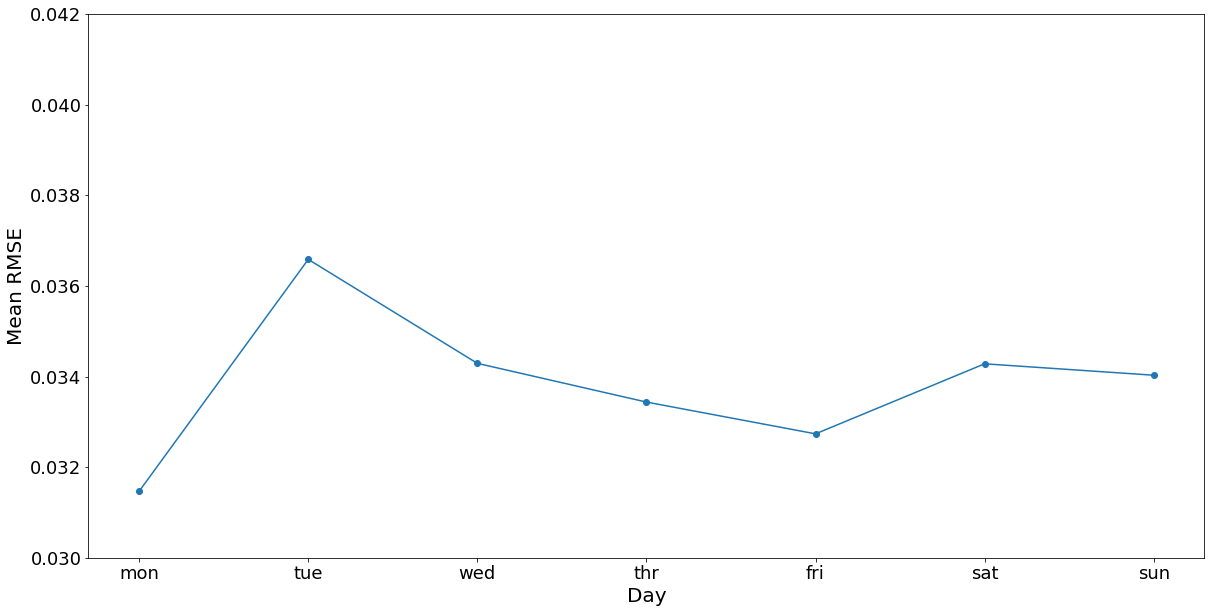

In [163]:
from matplotlib import pyplot
plt.figure(figsize=(20,10))
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

days = [ 'mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']
#scores=[0.03094075,0.02901203,0.03359999,0.023974707,0.03231462,0.030718094,0.038748294]
#scores=[0.028137203,0.03115582,0.03151903, 0.025724104,0.030900279,0.02798014,0.04021528]
pyplot.plot(days, rm, marker='o', label='reslstm-cnn')
plt.ylim(0.030,0.042)
plt.ylabel('Mean RMSE')
plt.xlabel('Day')
pyplot.show()

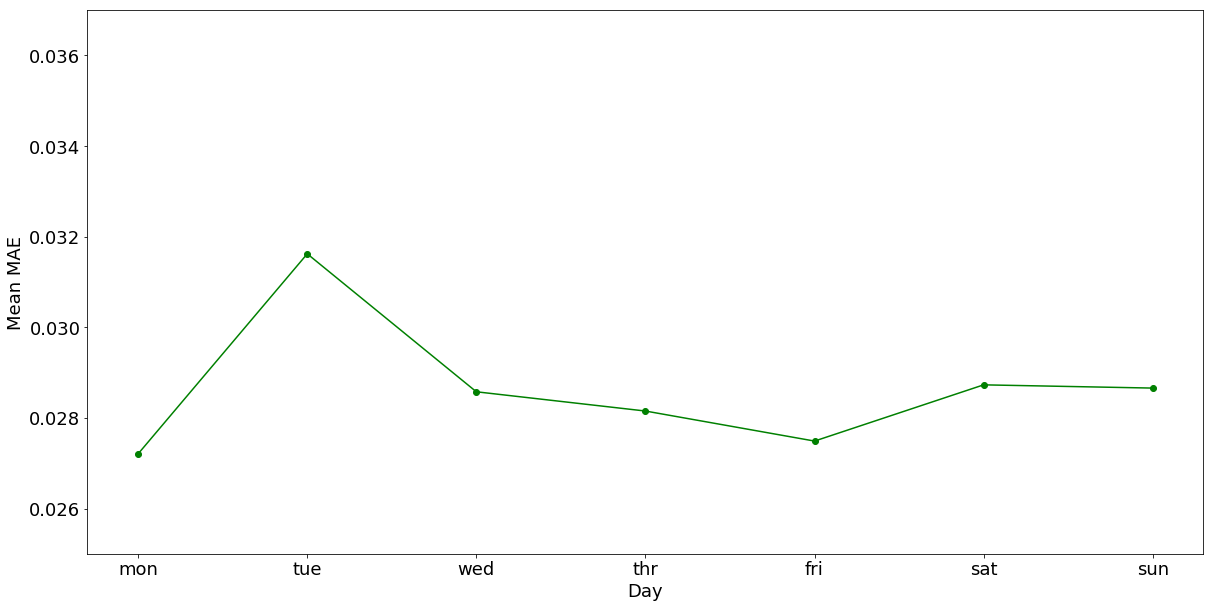

In [178]:
from matplotlib import pyplot
plt.figure(figsize=(20,10))

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 
days = [ 'mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']
#scores=[0.03094075,0.02901203,0.03359999,0.023974707,0.03231462,0.030718094,0.038748294]
#scores=[0.028137203,0.03115582,0.03151903, 0.025724104,0.030900279,0.02798014,0.04021528]
pyplot.plot(days, ma,'g', marker='o', label='reslstm-cnn')
plt.ylim(0.025,0.037)
plt.ylabel('Mean MAE')
plt.xlabel('Day')
pyplot.show()

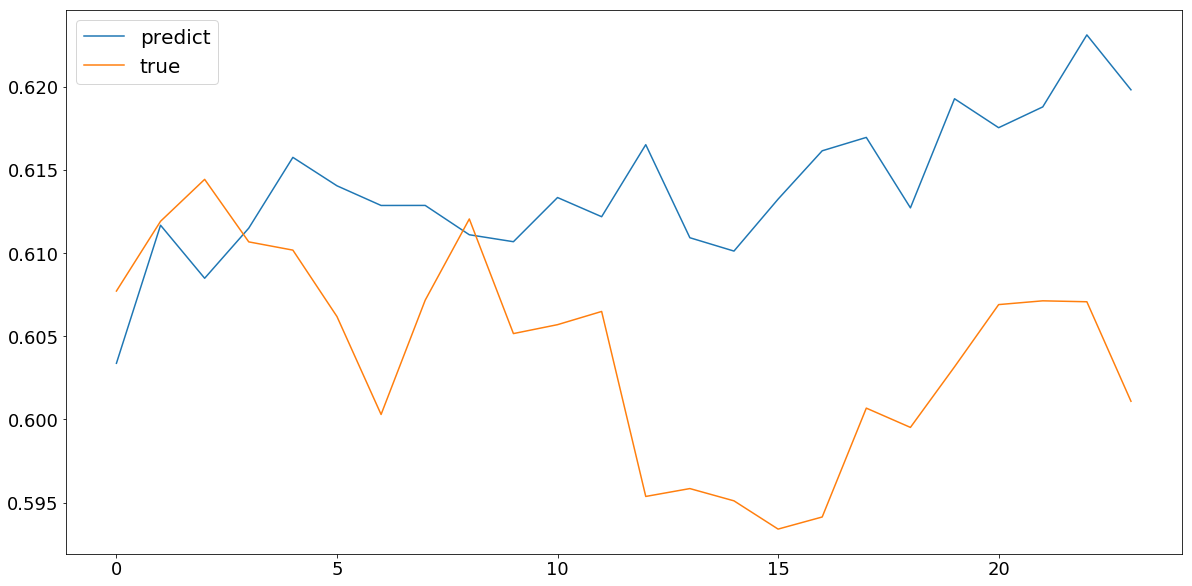

Test RMSE: 0.01256
Test MAE: 0.01077
Test MSE: 0.00016
Test RMSE: 98735796.80465
Test MAE: 84611432.00000


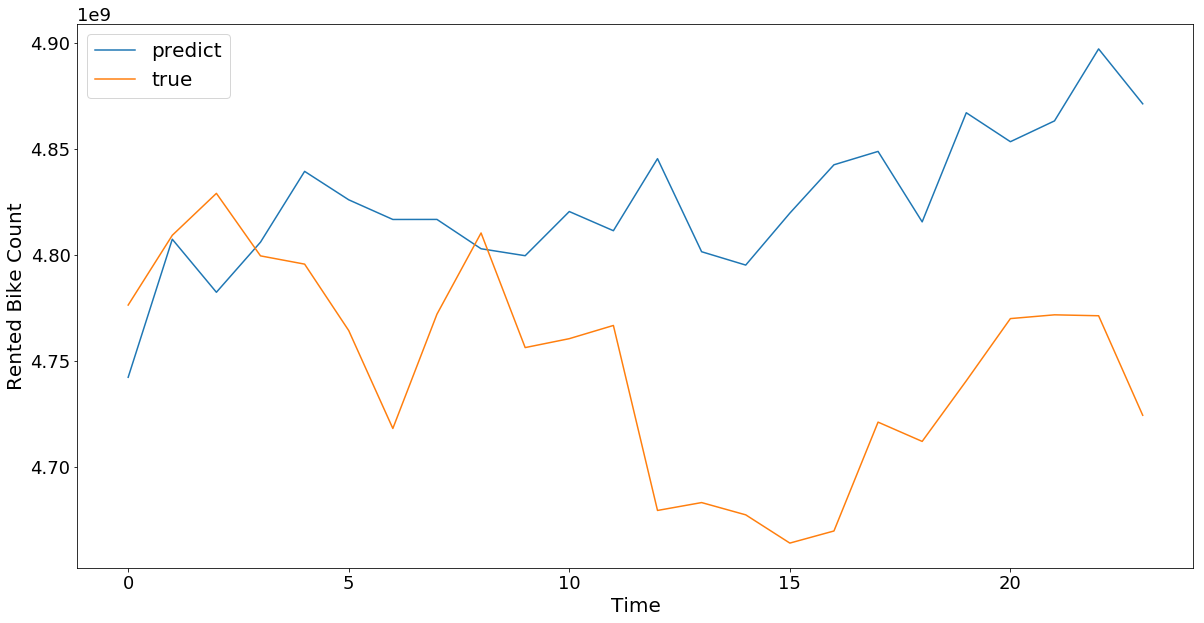

In [29]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*5+1]
testy=testY[24*5+1]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()
from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='true')
plt.xlabel('Time')
plt.ylabel('Rented Bike Count')
pyplot.legend()
pyplot.show()


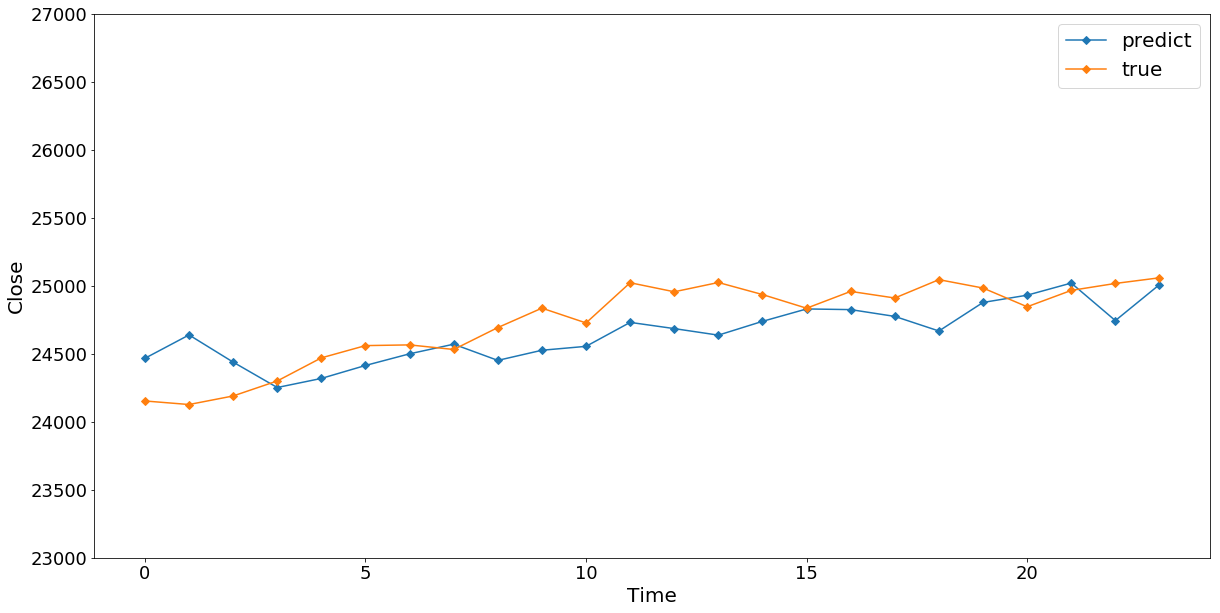

In [230]:
plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse,marker='D', label='predict')
pyplot.plot(testY_inverse,marker='D', label='true')
pyplot.legend()
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

plt.ylim(23000,27000)
plt.xlabel('Time')

plt.ylabel('Close')

pyplot.show()

## LSTM-CNN

In [43]:
first_input = Input(shape=(168,6))


in0=LSTM(64,return_sequences=True)(first_input)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0) #main
#in1= BatchNormalization(scale=False)(in0)
#a=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0) #skip

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1])

#ad=Dropout(0.5)(ad)
#in0=LSTM(64,return_sequences=True)(ad)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)
#b=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(ad) #skip
#ad=add([ad,ad1],name='extractor1')
in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same',name='extractor')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1],name='extractor2')


#in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(ad1)
#in1= BatchNormalization(scale=False)(in0)

#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([ad1,in1],name='extractor2')
#in0=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)

#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1])

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2)(ad1)
in1=Flatten()(in1)
#in1=Dropout(0.5)(in1)
#in1=Dense(100, activation='relu')(in1)
out=Dense(24,'relu')(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

model.summary()



checkpoint_path = "saved_weights/btc_multi_lstmcnn.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 168, 6)]          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 168, 64)           18176     
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 168, 64)           12352     
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 168, 64)           8256      
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 168, 64)           4160      
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 168, 64)           12352     
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 168, 64)           8256

In [44]:
hist = model.fit([trainX],trainY, epochs = 100,validation_data=([valX],valY), verbose = 1,callbacks=[cb])

Train on 7813 samples, validate on 808 samples
Epoch 1/100
7776/7813 [============================>.] - ETA: 0s - loss: 0.0015
Epoch 00001: val_loss improved from inf to 0.00105, saving model to saved_weights/btc_multi_lstmcnn.hdf5
7813/7813 [==============================] - 14s 2ms/sample - loss: 0.0015 - val_loss: 0.0010
Epoch 2/100
7808/7813 [============================>.] - ETA: 0s - loss: 8.7474e-05
Epoch 00002: val_loss did not improve from 0.00105
7813/7813 [==============================] - 12s 2ms/sample - loss: 8.7454e-05 - val_loss: 0.0012
Epoch 3/100
7808/7813 [============================>.] - ETA: 0s - loss: 7.2811e-05
Epoch 00003: val_loss improved from 0.00105 to 0.00091, saving model to saved_weights/btc_multi_lstmcnn.hdf5
7813/7813 [==============================] - 12s 2ms/sample - loss: 7.3181e-05 - val_loss: 9.0566e-04
Epoch 4/100
7808/7813 [============================>.] - ETA: 0s - loss: 7.7553e-05
Epoch 00004: val_loss did not improve from 0.00091
7813/7813 [

Epoch 34/100
7808/7813 [============================>.] - ETA: 0s - loss: 3.0467e-05
Epoch 00034: val_loss did not improve from 0.00021
7813/7813 [==============================] - 13s 2ms/sample - loss: 3.0452e-05 - val_loss: 4.6492e-04
Epoch 35/100
7808/7813 [============================>.] - ETA: 0s - loss: 3.1904e-05
Epoch 00035: val_loss did not improve from 0.00021
7813/7813 [==============================] - 13s 2ms/sample - loss: 3.1922e-05 - val_loss: 2.8343e-04
Epoch 36/100
7808/7813 [============================>.] - ETA: 0s - loss: 3.3046e-05
Epoch 00036: val_loss did not improve from 0.00021
7813/7813 [==============================] - 13s 2ms/sample - loss: 3.3035e-05 - val_loss: 4.1098e-04
Epoch 37/100
7808/7813 [============================>.] - ETA: 0s - loss: 3.0213e-05
Epoch 00037: val_loss did not improve from 0.00021
7813/7813 [==============================] - 13s 2ms/sample - loss: 3.0217e-05 - val_loss: 2.4192e-04
Epoch 38/100
7808/7813 [========================

7808/7813 [============================>.] - ETA: 0s - loss: 2.1759e-05
Epoch 00068: val_loss did not improve from 0.00021
7813/7813 [==============================] - 13s 2ms/sample - loss: 2.1764e-05 - val_loss: 2.8772e-04
Epoch 69/100
7776/7813 [============================>.] - ETA: 0s - loss: 2.5256e-05
Epoch 00069: val_loss did not improve from 0.00021
7813/7813 [==============================] - 12s 2ms/sample - loss: 2.5208e-05 - val_loss: 8.3300e-04
Epoch 70/100
7776/7813 [============================>.] - ETA: 0s - loss: 1.8012e-05
Epoch 00070: val_loss did not improve from 0.00021
7813/7813 [==============================] - 13s 2ms/sample - loss: 1.8009e-05 - val_loss: 5.1068e-04
Epoch 71/100
7808/7813 [============================>.] - ETA: 0s - loss: 1.8314e-05
Epoch 00071: val_loss did not improve from 0.00021
7813/7813 [==============================] - 12s 2ms/sample - loss: 1.8314e-05 - val_loss: 0.0011
Epoch 72/100
7776/7813 [============================>.] - ETA: 0s

In [42]:
model.load_weights('saved_weights/btc_multi_lstmcnn.hdf5')

ValueError: Shapes (10752, 24) and (3072, 24) are incompatible

In [181]:
aug_rm=[]
aug_ma=[]
rm=[]
ma=[]
day=[mon,tue,wed,thu,fri,sat,sun]
for i in day:
    for k in i:

        yhat = model.predict([testX])
        yhat=yhat[24*k]
        testy=testY[24*k]
        yhat=yhat.reshape(-1,1)
        testy=testy.reshape(-1,1)
        rmse = sqrt(mean_squared_error(testy, yhat))
        mae = mean_absolute_error(testy, yhat)
        print('Test MAE: %.5f' % mae)
        print('Test RMSE: %.5f' % rmse)
        aug_rm.append(rmse)
        aug_ma.append(mae)
    rm.append(np.mean(aug_rm))
    ma.append(np.mean(aug_ma))
        
    

    
    print(np.mean(aug_rm))
    print(np.mean(aug_ma))

Test MAE: 0.02286
Test RMSE: 0.02771
Test MAE: 0.05421
Test RMSE: 0.05987
Test MAE: 0.03779
Test RMSE: 0.04188
Test MAE: 0.02212
Test RMSE: 0.02755
Test MAE: 0.01894
Test RMSE: 0.02183
0.03576805473902368
0.031185323
Test MAE: 0.01226
Test RMSE: 0.01367
Test MAE: 0.01940
Test RMSE: 0.02136
Test MAE: 0.07080
Test RMSE: 0.07960
Test MAE: 0.07573
Test RMSE: 0.08514
Test MAE: 0.02004
Test RMSE: 0.02793
Test MAE: 0.04324
Test RMSE: 0.04678
0.04121037877750405
0.036126915
Test MAE: 0.00937
Test RMSE: 0.01297
Test MAE: 0.02532
Test RMSE: 0.02736
Test MAE: 0.03561
Test RMSE: 0.04679
Test MAE: 0.01934
Test RMSE: 0.02402
Test MAE: 0.01840
Test RMSE: 0.02243
Test MAE: 0.06104
Test RMSE: 0.08215
0.03935485458156868
0.033321727
Test MAE: 0.01411
Test RMSE: 0.01614
Test MAE: 0.01217
Test RMSE: 0.01918
Test MAE: 0.02848
Test RMSE: 0.03399
Test MAE: 0.02458
Test RMSE: 0.02889
Test MAE: 0.01011
Test RMSE: 0.01298
Test MAE: 0.06965
Test RMSE: 0.07341
0.03711422245439887
0.031546652
Test MAE: 0.03502
Tes

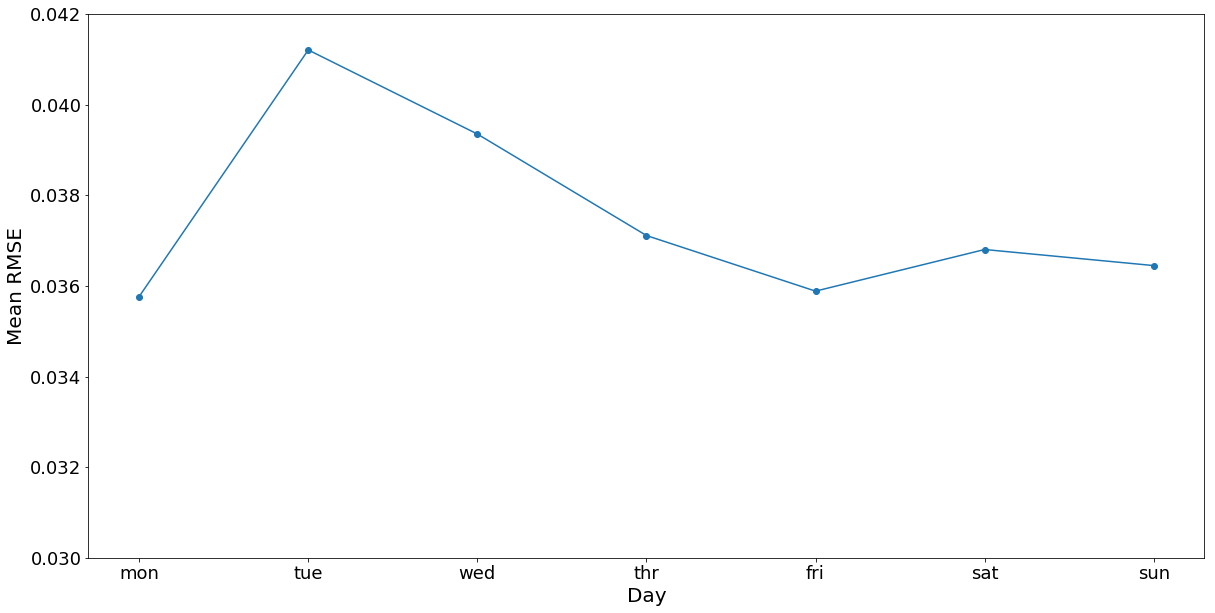

In [182]:
from matplotlib import pyplot
plt.figure(figsize=(20,10))
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
days = [ 'mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']
#scores=[0.03094075,0.02901203,0.03359999,0.023974707,0.03231462,0.030718094,0.038748294]
#scores=[0.028137203,0.03115582,0.03151903, 0.025724104,0.030900279,0.02798014,0.04021528]
pyplot.plot(days, rm, marker='o', label='reslstm-cnn')
plt.ylim(0.030,0.042)
plt.ylabel('Mean RMSE')
plt.xlabel('Day')
pyplot.show()

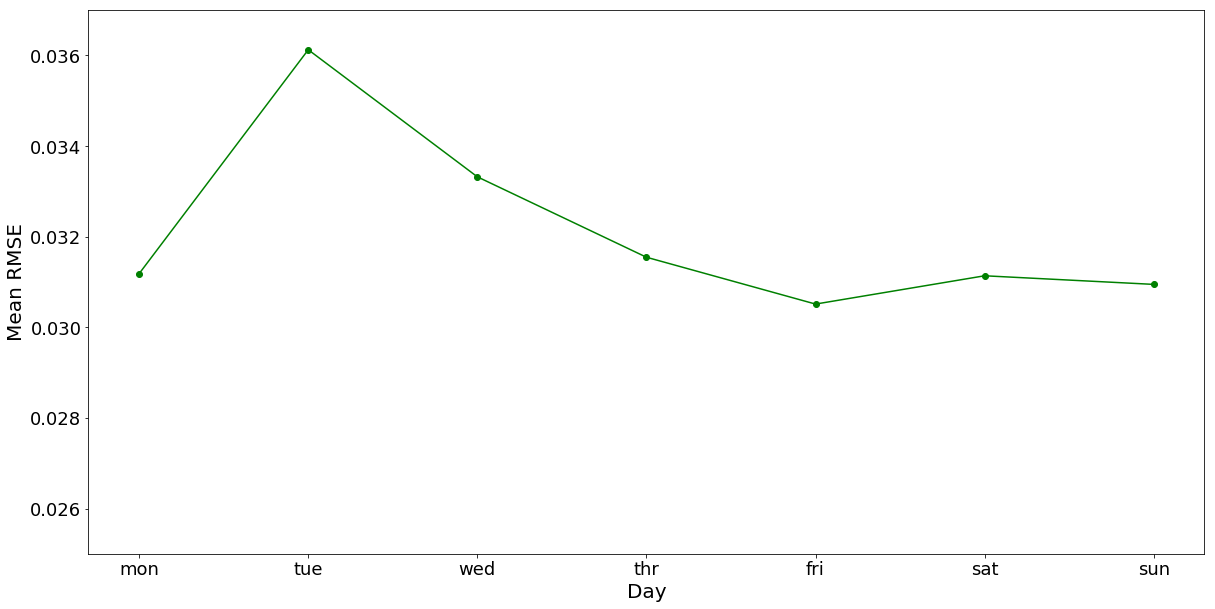

In [173]:
from matplotlib import pyplot
plt.figure(figsize=(20,10))
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
days = [ 'mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']
#scores=[0.03094075,0.02901203,0.03359999,0.023974707,0.03231462,0.030718094,0.038748294]
#scores=[0.028137203,0.03115582,0.03151903, 0.025724104,0.030900279,0.02798014,0.04021528]
pyplot.plot(days, ma,'g', marker='o', label='lstm-cnn')
plt.ylim(0.025,0.037)
plt.ylabel('Mean RMSE')
plt.xlabel('Day')
pyplot.show()

In [545]:
d=[]
for i in range(928):
    d.append(pre[i][0])

In [546]:
d

[0.5211437,
 0.5240309,
 0.5179195,
 0.51637685,
 0.5206344,
 0.52079904,
 0.51865005,
 0.517463,
 0.5115745,
 0.5076535,
 0.5135038,
 0.504299,
 0.50905895,
 0.5005451,
 0.5011448,
 0.5041374,
 0.50564075,
 0.50326425,
 0.5083856,
 0.5149624,
 0.5126081,
 0.50779223,
 0.5107501,
 0.5096473,
 0.5145417,
 0.5109348,
 0.5099327,
 0.51104116,
 0.51472354,
 0.5128623,
 0.5128032,
 0.5178187,
 0.5152471,
 0.5232927,
 0.5236552,
 0.52165186,
 0.5209615,
 0.5174018,
 0.51718163,
 0.52048296,
 0.52039367,
 0.5215902,
 0.52157587,
 0.524366,
 0.52918243,
 0.52987546,
 0.5466044,
 0.5416757,
 0.54473794,
 0.53157884,
 0.5340942,
 0.5352894,
 0.53560716,
 0.5411441,
 0.5435109,
 0.54425436,
 0.5423015,
 0.54904777,
 0.55199325,
 0.54893935,
 0.55616933,
 0.5548592,
 0.55740917,
 0.554045,
 0.5520224,
 0.55526173,
 0.5538298,
 0.55753946,
 0.55433804,
 0.5520792,
 0.5566129,
 0.5565863,
 0.55767334,
 0.56931335,
 0.57552475,
 0.5825172,
 0.58166057,
 0.5769925,
 0.5849946,
 0.5966756,
 0.6055471,


In [40]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[0]
testy=testY[0]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

ValueError: Error when checking input: expected input_2 to have shape (48, 6) but got array with shape (168, 6)

In [38]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*thu[1]+1]
testy=testY[24*thu[1]+1]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='true')
plt.xlabel('Time')
plt.ylabel('Rented Bike Count')
pyplot.legend()
pyplot.show()


ValueError: Error when checking input: expected input_2 to have shape (48, 6) but got array with shape (168, 6)

In [28]:
plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='true')
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

plt.xlabel('Time')
plt.ylabel('Rented Bike Count')
plt.ylim(28000,32000)
pyplot.legend()
pyplot.show()

NameError: name 'pyplot' is not defined

<Figure size 1440x720 with 0 Axes>

In [25]:
def gradient_importance(seq, model):

    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)

    with tf.GradientTape() as tape:
        predictions = model(seq)

    grads = tape.gradient(predictions, seq)
    #gr=grads
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grads

def gradient_weight(seq, model):

    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)

    with tf.GradientTape() as tape:
        predictions = model(seq)

    grad = tape.gradient(predictions, seq)
    #gr=grads
    #grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grad

def activation_grad(seq, model):
    
    seq = seq[np.newaxis,:,:]
    grad_model = Model([model.inputs], 
                       [model.get_layer('extractor').output, 
                        model.output])

    # Obtain the predicted value and the intermediate filters
    with tf.GradientTape() as tape:
        seq_outputs, predictions = grad_model(seq)

    # Extract filters and gradients
    output = seq_outputs[0]
    grads = tape.gradient(predictions, seq_outputs)[0]
    print(grads)

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=0)
    
    # Get a ponderated map of filters according to grad importance
    cam = np.ones(output.shape[0], dtype=np.float32)
    for index, w in enumerate(weights):
        cam += w * output[:, index]

    time = int(seq.shape[1]/output.shape[0])
    cam = zoom(cam.numpy(), time, order=1)
    heatmap = (cam - cam.min())/(cam.max() - cam.min())
    
    return heatmap

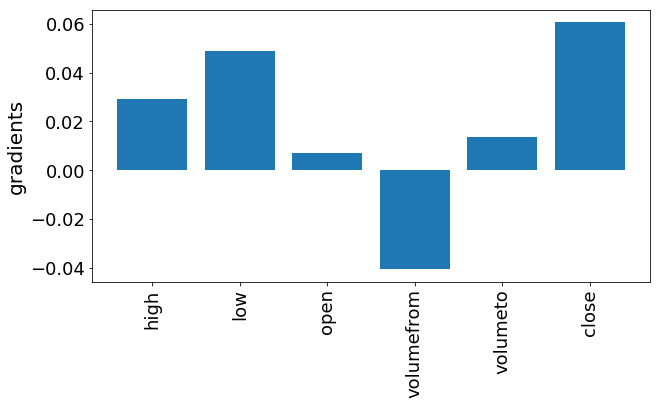

In [30]:
columns=data.columns[1:7]
X_test=testX.copy()
id_=24*mon[0]+2
grad_imp = gradient_importance(X_test[id_], model)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

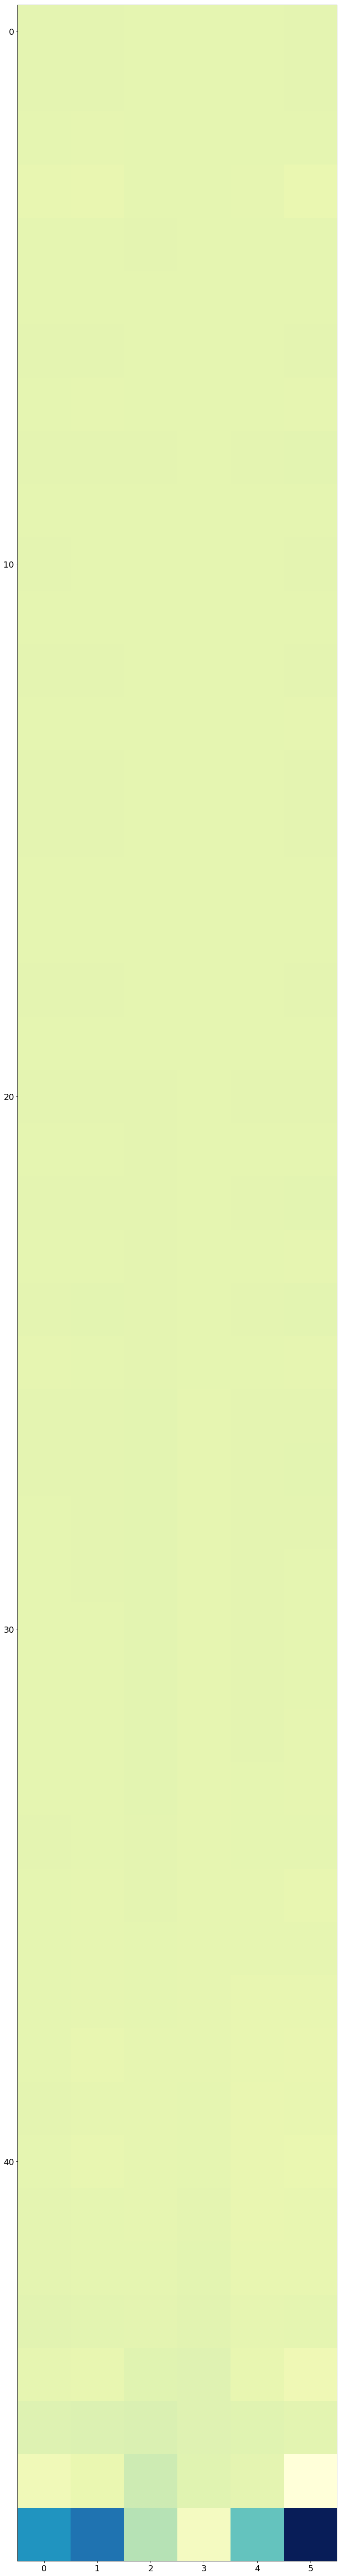

In [42]:
import matplotlib.pyplot as plt
import numpy as np

grad_weight = gradient_weight(X_test[8], model)

#grad_weight=grad_weight.reshape(48,4)

plt.figure(figsize=(50,100))
a=grad_weight.numpy()
a=a.reshape(48,6)
plt.imshow(a,  cmap="YlGnBu", interpolation='nearest')
plt.show()


tf.Tensor(
[[-2.e-01  1.e+00  5.e-02 ... -4.e-04 -1.e-03  5.e-02]
 [-3.e-02  6.e-01  4.e-01 ...  7.e-02  2.e-01 -2.e-01]
 [ 1.e-01  3.e-02 -1.e-01 ... -8.e-02  2.e-01  6.e-02]
 ...
 [ 2.e-01 -3.e+00  8.e-02 ...  6.e-02 -6.e-02 -4.e-02]
 [ 3.e-02 -7.e-01  2.e-01 ... -2.e-01 -1.e-01  5.e-02]
 [ 6.e-02  1.e+00 -1.e-02 ... -7.e-02 -1.e-01  3.e-02]], shape=(48, 64), dtype=float32)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]


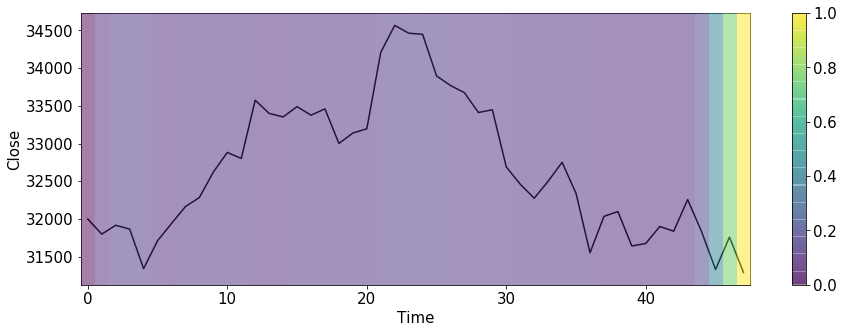

In [138]:
from scipy.ndimage import zoom
import random
import pylab
from tensorflow.keras.models import Model

#id_=24*20
id_=24*34


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))
testX_inverse=list(TestX[id_][:,-1])
plt.plot(testX_inverse, 'k')
#plt.plot(testX_inverse1, 'b')

#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Close'); plt.xlabel('Time'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

pyplot.show()


np.set_printoptions(False)

In [50]:
X_test[id_][:,-1]*(np.max(values)-np.min(values))+np.min(values)

array([5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09,
       5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09,
       5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09,
       5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09,
       5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09,
       5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09, 5.e+09],
      dtype=float32)

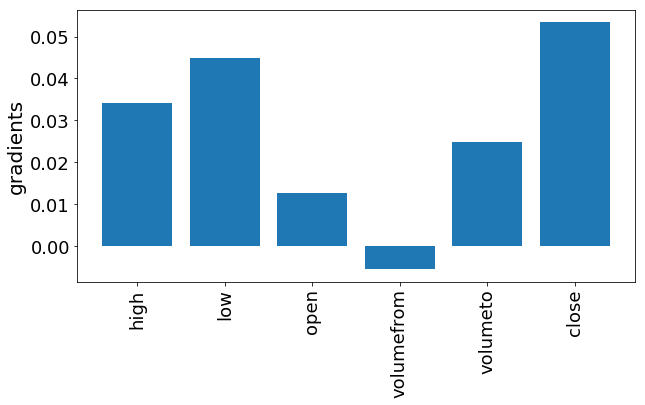

In [34]:

columns=data.columns[1:7]
X_test=testX.copy()
id_=24*mon[1]+2
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

In [37]:
columns=data.columns[1:7]
X_test=testX.copy()
id_=24*mon[1]+2
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

InvalidArgumentError: Matrix size-incompatible: In[0]: [1,10752], In[1]: [3072,24] [Op:MatMul]

### res

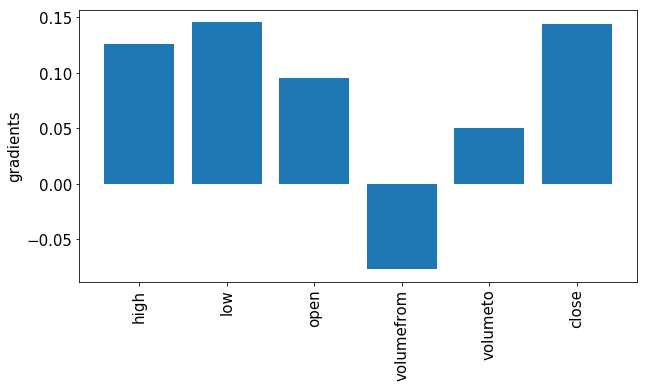

In [109]:

columns=data.columns[1:7]
X_test=testX.copy()
id_=24*mon[-1]+2
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

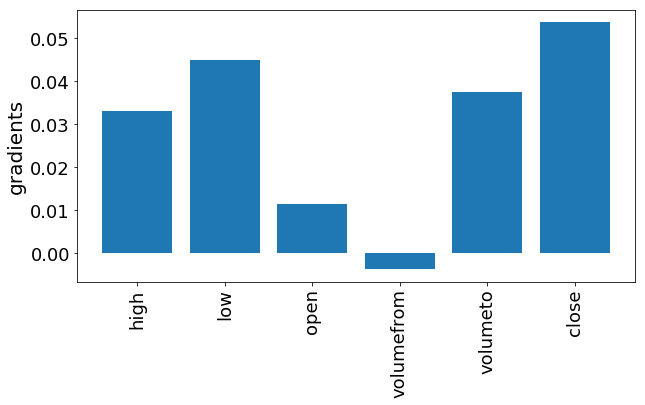

In [206]:


columns=data.columns[1:7]
X_test=testX.copy()
id_=24*sun[-1]+2
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

tf.Tensor(
[[-0.  0. -0. ... -0. -0.  0.]
 [-0. -0. -0. ...  0.  0.  1.]
 [-0. -0. -0. ... -0.  0.  0.]
 ...
 [ 1. -1. -1. ... -0. -1.  0.]
 [ 0.  2.  1. ... -0. -1. -2.]
 [-1. -0.  0. ... -0.  1.  3.]], shape=(168, 64), dtype=float32)
[1.e-01 3.e-01 4.e-01 4.e-01 3.e-01 2.e-01 2.e-01 1.e-01 1.e-01 1.e-01
 8.e-02 5.e-02 4.e-02 2.e-02 2.e-02 2.e-02 2.e-02 2.e-02 3.e-02 3.e-02
 1.e-02 6.e-03 2.e-02 2.e-02 3.e-02 2.e-02 3.e-02 3.e-02 4.e-02 4.e-02
 3.e-02 2.e-02 1.e-02 2.e-02 2.e-02 2.e-02 2.e-02 2.e-02 3.e-02 3.e-02
 4.e-02 5.e-02 5.e-02 5.e-02 5.e-02 4.e-02 5.e-02 4.e-02 4.e-02 3.e-02
 4.e-02 4.e-02 4.e-02 4.e-02 4.e-02 5.e-02 5.e-02 5.e-02 5.e-02 5.e-02
 4.e-02 4.e-02 4.e-02 5.e-02 4.e-02 4.e-02 4.e-02 4.e-02 4.e-02 5.e-02
 5.e-02 4.e-02 3.e-02 3.e-02 3.e-02 3.e-02 4.e-02 5.e-02 4.e-02 4.e-02
 4.e-02 4.e-02 4.e-02 5.e-02 5.e-02 5.e-02 4.e-02 4.e-02 4.e-02 5.e-02
 5.e-02 4.e-02 4.e-02 4.e-02 4.e-02 4.e-02 4.e-02 5.e-02 5.e-02 4.e-02
 4.e-02 4.e-02 5.e-02 5.e-02 4.e-02 5.e-02 5.e-02 5.e-

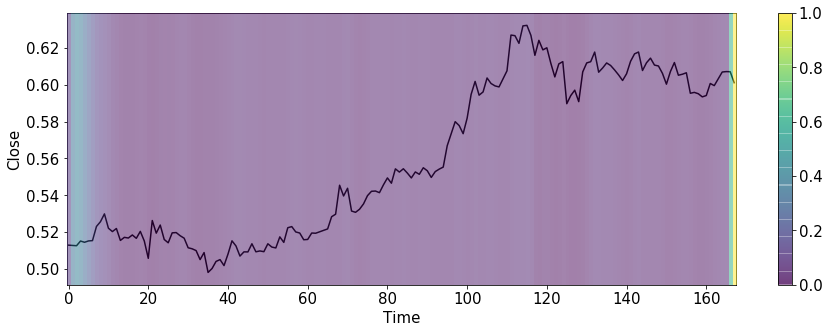

In [213]:
from scipy.ndimage import zoom
import random
import pylab
from tensorflow.keras.models import Model

id_=24*1


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))
testX_inverse=list(X_test[id_][:,-1])

plt.plot(testX_inverse, 'k')
#plt.plot(testX_inverse1, 'b')

#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Close'); plt.xlabel('Time'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

pyplot.show()


np.set_printoptions(False)

tf.Tensor(
[[-0.  0. -0. ... -0. -0.  0.]
 [-0.  0.  0. ... -0.  0. -0.]
 [-0. -0. -0. ... -0.  0. -0.]
 ...
 [-0. -1. -0. ... -0. -0. -1.]
 [ 2.  1.  0. ... -1. -0.  1.]
 [ 0.  0.  1. ... -0.  2. -0.]], shape=(48, 64), dtype=float32)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]


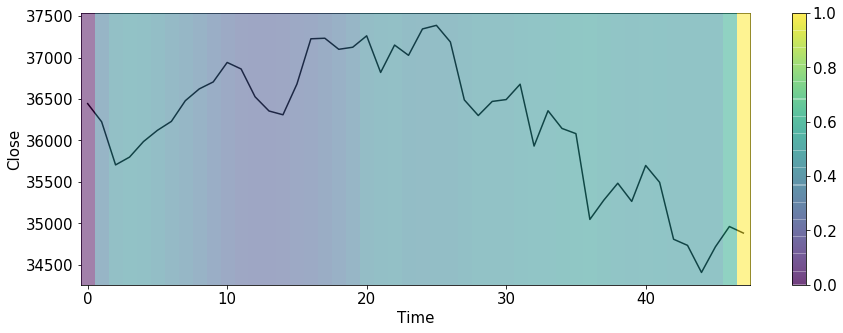

In [132]:
from scipy.ndimage import zoom
import random
import pylab
from tensorflow.keras.models import Model

id_=24*3


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(testX_inverse1, 'b')

#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Close'); plt.xlabel('Time'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

pyplot.show()


np.set_printoptions(False)

### ori

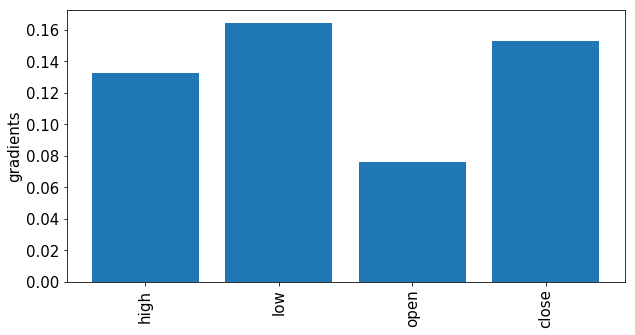

In [379]:
columns='high', 'low', 'open', 'close'
X_test=testX.copy()
id_=24*mon[-1]+2
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

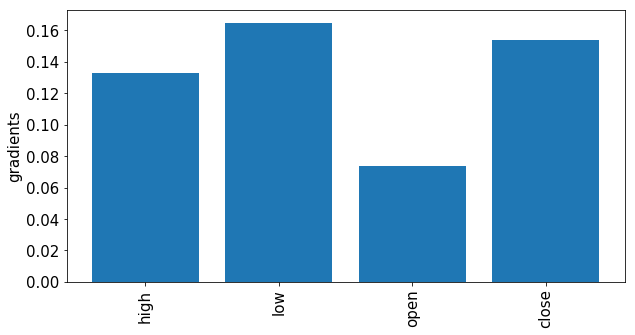

In [375]:
columns='high', 'low', 'open', 'close'
X_test=testX.copy()
id_=24*sun[-1]+2
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

In [380]:
testX_inverse=X_test[id_][:,-1]*(np.max(values)-np.min(values))+np.min(values)
testX_inverse

array([32074., 32194., 32142., 31607., 31985., 32218., 32447., 32570.,
       32914., 33179., 33098., 33886., 33707., 33660., 33799., 33683.,
       33769., 33301., 33442., 33499., 34532., 34898., 34792., 34777.,
       34215., 34085., 33987., 33719., 33757., 32983., 32750., 32560.,
       32789., 33046., 32625., 31821., 32314., 32380., 31913., 31948.,
       32178., 32113., 32542., 32107., 31596., 32034., 31556., 32045.],
      dtype=float32)

In [253]:
testX_inverse1=X_test[id_][:,-3]*(np.max(values)-np.min(values))+np.min(values)
testX_inverse1

array([36728., 36284., 36428., 36574., 36687., 36859., 37049., 37162.,
       37290., 37556., 37535., 37384., 37171., 37088., 37108., 37414.,
       37851., 37951., 37693., 36868., 37551., 37153., 37851., 37740.,
       38163., 37933., 37349., 36925., 36978., 37301., 37215., 36768.,
       36505., 36876., 36594., 35825., 35615., 36050., 36000., 36067.,
       36219., 35340., 35163., 34782., 34807., 35032., 35654., 34928.],
      dtype=float32)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]


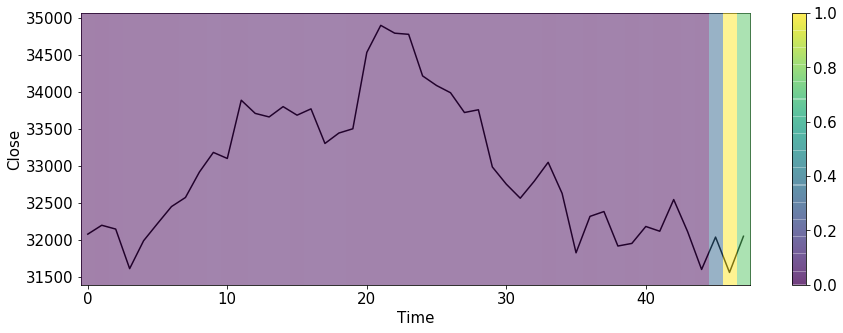

In [381]:
from scipy.ndimage import zoom
import random
import pylab
from tensorflow.keras.models import Model

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(testX_inverse1, 'b')

#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Close'); plt.xlabel('Time'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

pyplot.show()


np.set_printoptions(False)

[8.e-06 1.e-03 0.e+00 2.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 2.e-02
 2.e-02 2.e-02 2.e-02 2.e-02 2.e-02 2.e-02 2.e-02 2.e-02 1.e-02 2.e-02
 2.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02
 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02
 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 3.e-01 1.e+00 7.e-01]


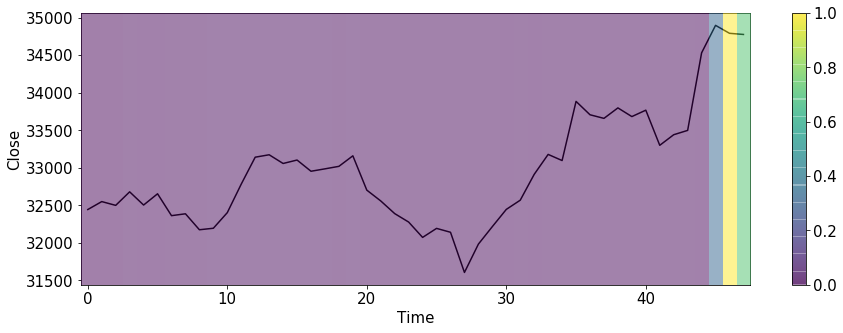

In [378]:
from scipy.ndimage import zoom
import random
import pylab
from tensorflow.keras.models import Model

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(testX_inverse1, 'b')

#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Close'); plt.xlabel('Time'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

pyplot.show()


np.set_printoptions(False)

## CNN-LSTM

In [183]:
first_input = Input(shape=(48,6))


#in0=LSTM(64,return_sequences=True)(first_input)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(first_input) #main
#in1= BatchNormalization(scale=False)(in0)
#a=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0) #skip

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#ad=add([in0,in1],name='extractor')

#ad=Dropout(0.5)(ad)
#in0=LSTM(64,return_sequences=True)(ad)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)
#b=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(ad) #skip
#ad=add([ad,ad1],name='extractor1')
in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
in1=LSTM(64,return_sequences=False)(in1)
#in1=Flatten()(in1)
#in1=Dropout(0.5)(in1)
in1=Dense(100, activation='relu')(in1)
out=Dense(24,'relu')(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

model.summary()



checkpoint_path = "saved_weights/btc_cnnlstm_multi.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

Model: "model_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 48, 6)]           0         
_________________________________________________________________
conv1d_110 (Conv1D)          (None, 48, 64)            1216      
_________________________________________________________________
conv1d_111 (Conv1D)          (None, 48, 64)            8256      
_________________________________________________________________
conv1d_112 (Conv1D)          (None, 48, 64)            4160      
_________________________________________________________________
conv1d_113 (Conv1D)          (None, 48, 64)            12352     
_________________________________________________________________
conv1d_114 (Conv1D)          (None, 48, 64)            8256      
_________________________________________________________________
conv1d_115 (Conv1D)          (None, 48, 64)            416

In [ ]:
hist = model.fit([trainX],trainY, epochs = 50,validation_data=([valX],valY), verbose = 1,callbacks=[cb])

In [80]:
def gradient_importance(seq, model):

    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)

    with tf.GradientTape() as tape:
        predictions = model(seq)

    grads = tape.gradient(predictions, seq)
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grads



def activation_grad(seq, model):
    
    seq = seq[np.newaxis,:,:]
    grad_model = Model([model.inputs], 
                       [model.get_layer('extractor').output, 
                        model.output])

    # Obtain the predicted value and the intermediate filters
    with tf.GradientTape() as tape:
        seq_outputs, predictions = grad_model(seq)

    # Extract filters and gradients
    output = seq_outputs[0]
    grads = tape.gradient(predictions, seq_outputs)[0]

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=0)
    
    # Get a ponderated map of filters according to grad importance
    cam = np.ones(output.shape[0], dtype=np.float32)
    for index, w in enumerate(weights):
        cam += w * output[:, index]

    time = int(seq.shape[1]/output.shape[0])
    cam = zoom(cam.numpy(), time, order=1)
    heatmap = (cam - cam.min())/(cam.max() - cam.min())
    
    return heatmap

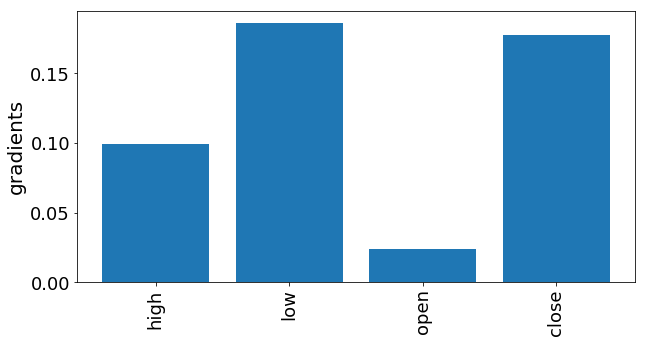

In [257]:

columns='high', 'low', 'open', 'close'
X_test=testX.copy()
id_=24*sat[2]+1
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

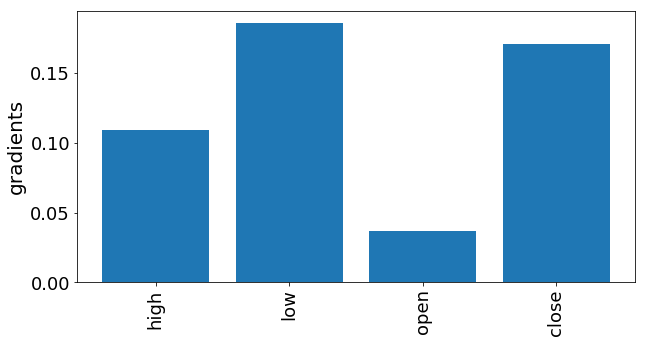

In [260]:

columns='high', 'low', 'open', 'close'
X_test=testX.copy()
id_=24*thu[0]+1
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

In [261]:

testX_inverse=X_test[id_][:,0]*(np.max(values)-np.min(values))+np.min(values)
testX_inverse

array([23551., 23305., 23304., 23340., 23275., 23279., 23164., 23034.,
       23120., 22901., 22866., 22880., 22609., 22694., 22781., 22794.,
       22871., 23131., 23125., 23004., 22940., 22950., 23053., 23083.,
       22945., 23007., 23125., 23084., 23067., 23212., 23222., 23401.,
       23450., 23478., 23309., 23271., 23205., 23268., 23301., 23337.,
       23342., 23537., 23632., 23689., 24348., 24311., 24214., 24192.],
      dtype=float32)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]


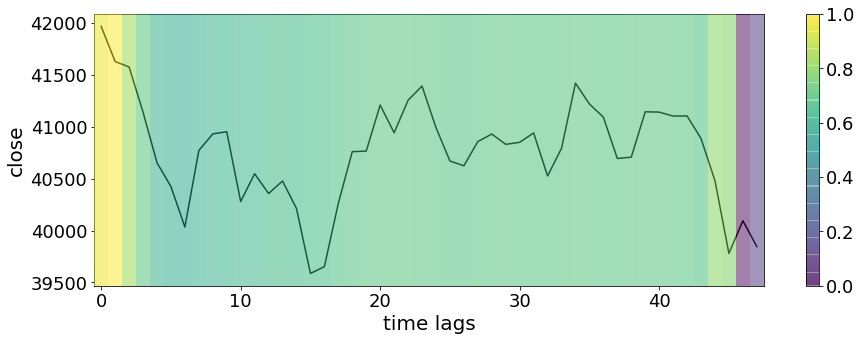

In [259]:
## saturday

from scipy.ndimage import zoom
import random
import pylab
from tensorflow.keras.models import Model

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('close'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*100), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]


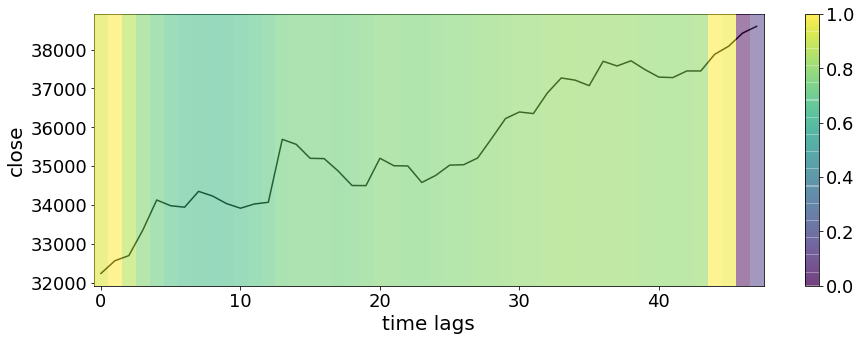

In [256]:
##wed

from scipy.ndimage import zoom
import random
import pylab
from tensorflow.keras.models import Model

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('close'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*100), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)